In [1]:
#!pip install qiskit

In [5]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector

In [3]:
qc= QuantumCircuit()
qc

In [4]:
qr= QuantumRegister(2,'qreg')
qr

QuantumRegister(2, 'qreg')

In [5]:
qc.add_register(qr)
qc.qregs

[QuantumRegister(2, 'qreg')]

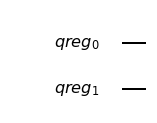

In [6]:
qc.draw(output = 'mpl')

In [7]:
qc.h(qr[0])
qc.cx(qr[0],qr[1])

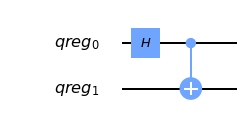

In [8]:
qc.draw(output='mpl')

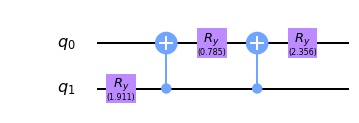

In [14]:
qc_hardy = QuantumCircuit(2)
qc_hardy.ry(1.911,1)
qc_hardy.cx(1,0)
qc_hardy.ry(0.785,0)
qc_hardy.cx(1,0)
qc_hardy.ry(2.356,0)

qc_hardy.draw(output='mpl')

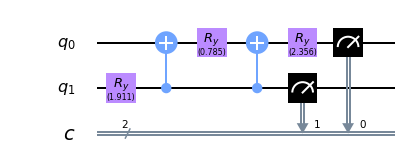

In [15]:
measurements = QuantumCircuit(2,2)
# z measurement on both qubits
measurements.measure(0,0)
measurements.measure(1,1)

qc = qc_hardy + measurements
qc.draw(output='mpl')


Results for two z measurements:


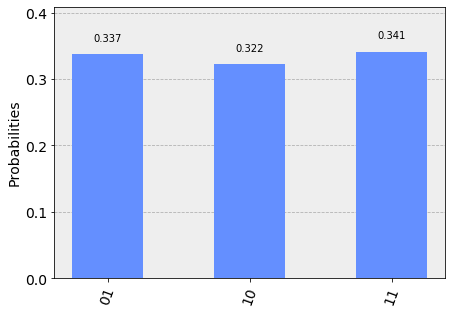

In [16]:
print('\nResults for two z measurements:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

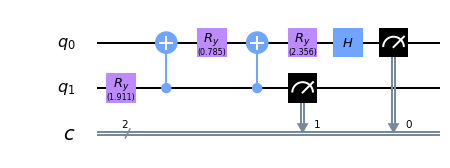

In [17]:
measurements = QuantumCircuit(2,2)
# x measurement on qubit 0
measurements.h(0)
measurements.measure(0,0)
# z measurement on qubit 1
measurements.measure(1,1)

qc = qc_hardy + measurements
qc.draw(output='mpl')


Results for two x measurement on both qubits:


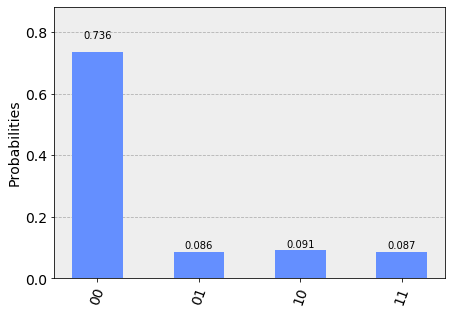

In [22]:
measurements = QuantumCircuit(2,2)
measurements.h(0)
measurements.measure(0,0)
measurements.h(1)
measurements.measure(1,1)

qc = qc_hardy + measurements
qc.draw()
print('\nResults for two x measurement on both qubits:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


In [9]:
#qc.data.pop(1)

In [10]:
vector_sim= Aer.get_backend("statevector_simulator")
#the 'statevector simulator' to see what is happening to the state vector of the two qubits.

In [11]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [12]:
exc=execute(qc,vector_sim)

In [13]:
ket= exc.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


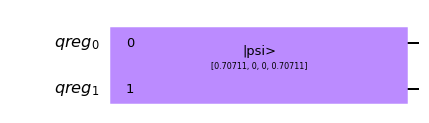

In [14]:
qc2=QuantumCircuit(qr)
qc2.initialize(ket,qr)# to initalise ckt with a state
qc2.draw(output='mpl')

In [15]:
cr= ClassicalRegister(2,'creg')

In [16]:
qc.add_register(cr)

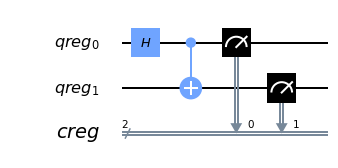

In [17]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

In [18]:
emu=Aer.get_backend("qasm_simulator")# define a simulator
exc2=execute(qc,emu,shots=10124)# excute the ckt called ##job in examoles

In [19]:
res=exc2.result().get_counts()
res

{'11': 5022, '00': 5102}

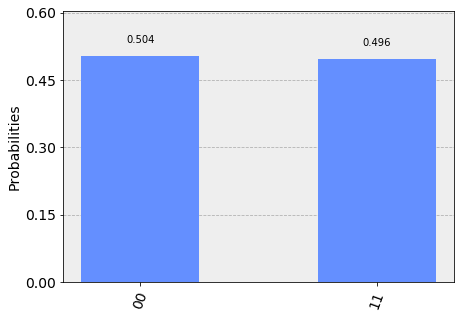

In [20]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(res)

In [21]:
job = execute( qc, emu, shots=10, memory=True )
samples = job.result().get_memory()
print(samples)

['00', '11', '00', '11', '11', '00', '11', '00', '00', '00']


In [22]:
qr= QuantumRegister(8)
cr= ClassicalRegister(8)
qc= QuantumCircuit(qr,cr)
qc.x(qr[7])
qc.measure(qr,cr)# al measurements at once 0-7
qc.draw()

In [23]:
execute(qc,emu, shots= 10000).result().get_counts()

{'10000000': 10000}

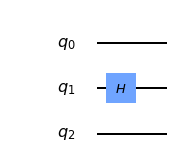

In [24]:
qc=QuantumCircuit(3)
qc.h(1)
qc.data
qc.draw(output='mpl')

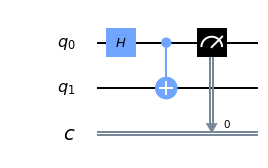

In [25]:
qc=QuantumCircuit(2,1)
qc.h(0)
qc.cx(0,1)
qc.measure(0,0)
qc.draw(output="mpl")

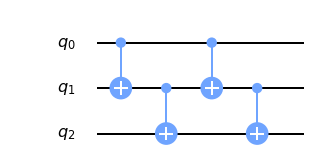

In [26]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw(output='mpl')

In [27]:
newgate= sub_circuit.to_instruction()

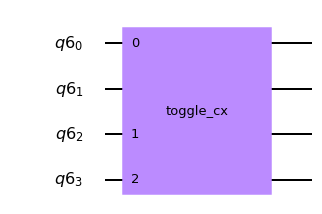

In [34]:

qr=QuantumRegister(4)
new_qc=QuantumCircuit(qr)
new_qc.append(newgate, [qr[0],qr[2],qr[3]])
new_qc.draw(output='mpl')

In [36]:
IBMQ.save_account('103ef88d927844f482044ade7524261c880de733b896101f9e485e5085978c95250f7c2a449979c648aca7d069ef8156b57ced40191c493ae47df8fe668baed4')

In [37]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [38]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [39]:
providers=IBMQ.get_provider(hub='ibm-q')
providers.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [46]:
for x in providers.backends():
    #print(x.status())
    print(x.configuration())

QasmBackendConfiguration(allow_object_storage=True, allow_q_circuit=False, allow_q_object=True, backend_name='ibmq_qasm_simulator', backend_version='0.1.547', basis_gates=['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'ccx', 'swap', 'unitary', 'initialize', 'kraus'], conditional=True, coupling_map=None, gates=[GateConfig(name='u1', parameters=['lambda'], qasm_def='gate u1(lambda) q { U(0,0,lambda) q; }'), GateConfig(name='u2', parameters=['phi', 'lambda'], qasm_def='gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }'), GateConfig(name='u3', parameters=['theta', 'phi', 'lambda'], qasm_def='u3(theta,phi,lambda) q { U(theta,phi,lambda) q; }'), GateConfig(name='cx', parameters=[], qasm_def='gate cx q1,q2 { CX q1,q2; }')], local=False, max_experiments=300, max_shots=8192, memory=True, n_qubits=32, online_date=datetime.datetime(2019, 5, 2, 8, 15, tzinfo=datetime.timezone.utc), open_pulse=False, simulator=True)
QasmBackendConfiguration(allow_object_storage=True,

In [47]:
device=providers.get_backend('ibmq_16_melbourne')

In [57]:
properties = device.properties()
coupling_map = device.configuration().coupling_map
print(coupling_map)

[[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]


In [50]:
from qiskit.providers.aer import noise
noise_model = noise.device.basic_device_noise_model(properties)

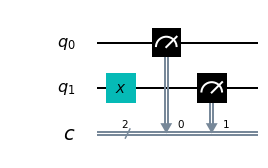

In [52]:
qc=QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

qc.draw(output='mpl')


In [59]:
job=execute(qc, device)
job.result().get_counts()

{'10': 926, '11': 19, '00': 78, '01': 1}

In [13]:
qc=QuantumCircuit(1)

In [14]:
mz=QuantumCircuit(1,1)
mz.measure(0,0)

mx=QuantumCircuit(1,1)
mx.h(0)
mx.measure(0,0)

my=QuantumCircuit(1,1)
my.sdg(0)
my.h(0)
my.measure(0,0)

In [17]:
shots=3000
bloch_vectors=[]

for x in [mz,mx,my]:

        counts = execute(x+qc,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

        probs={}
        for outputs in ['0','1']:
            if outputs in counts:
                probs[outputs]=counts[outputs]/shots
            else:
                prob[outputs]= 0
        print(probs)
        bloch_vectors.append(probs['0']-probs['1'])
bloch_vectors

{'0': 1.0}


KeyError: '1'

In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.rz(3.14/4,1)

backend = Aer.get_backend('statevector_simulator')
counts = execute(qc,backend).result().get_statevector()
counts

array([0.5       +0.j        , 0.5       +0.j        ,
       0.35369413+0.35341259j, 0.35369413+0.35341259j])